# Название проекта: "Большой БигДатовский и Властелин Пандаса: Анализ фильмов и сериалов с IMBD"

## Описание датасета:


IMDB - это популярный зарубежный сайт с рейтингами на кино и сериалы. Там любой желающий может поставить рейтинг фильму или сериалу, а также написать рецензию.

Этот датасет содержит более 7-ми тысяч фильмов и сериалов с оценками, взятыми с IMDB.

### Содержание

Колонки

Name: Название фильма/сериала

Data: Дата создания

Rate: Рейтинг с IMDB

Votes: Количества голосов

Genre: Жанр

Duration: Продолжительность

Type: тип ('Series' или 'Film')

### Возрастной рейтинг:

TV-Y: Designed to be appropriate for all children

TV-Y7: Suitable for ages 7 and up

G: Suitable for General Audiences

TV-G: Suitable for General Audiences

PG: Parental Guidance suggested

TV-PG: Parental Guidance suggested

PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.

R: Restricted. May be inappropriate for ages 17 and under.

TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.

NC-17: Inappropriate for ages 17 and under

### Доп столбцы

Episodes: Number of Episodes only for series

Nudity, violence and etc.: How much does it have of these

Ссылка на датасет: [IMDB-Rating](https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series)

Let's code!!! 

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm

# Причесываем датасет

In [2]:
data = pd.read_csv(r'/Users/User/Desktop/VS code/BDA_2024-2025/project/imdb.csv')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Удалим повторяющиеся фильмы и сериалы (поверьте, они есть)

In [3]:
data = data.drop_duplicates(subset='Name')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Уберем фильмы/сериалы без рейтинга

In [4]:
data = data[data['Rate'] != 'No Rate']
data = data[data['Votes'] != 'No Votes']
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


In [5]:
data['Votes'] = data['Votes'].str.replace(',','').astype(float)
data['Rate'] = data['Rate'].astype(float)
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492.0,Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448.0,"Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887.0,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


# Проверка первой гипотезы

$H_0$: Рейтинги фильмов с высоким количеством голосов (например, >10000) в среднем не отличаются от рейтингов фильмов с меньшим количеством голосов.

$H_1$: Фильмы с большим количеством голосов имеют более высокие рейтинги в среднем

In [6]:
Films = data[data['Type'] == 'Film']
films_huge_votes = Films[Films['Votes'] > 10000]
films_huge_votes.sort_values(by='Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
270,The Dark Knight,2008,9.0,2428117.0,"Action, Crime, Drama",152.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Severe
318,Inception,2010,8.8,2178860.0,"Action, Adventure, Sci-Fi",148.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Moderate
339,Fight Club,1999,8.8,1948261.0,Drama,139.0,Film,R,-,Moderate,Severe,Severe,Moderate,Severe
320,Pulp Fiction,1994,8.9,1915230.0,"Crime, Drama",154.0,Film,R,-,Moderate,Severe,Severe,Severe,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,The Little Vampire,2000,5.8,10173.0,"Adventure, Comedy, Family",95.0,Film,PG,-,No Rate,Mild,NaN,Mild,Mild
3225,Pánico en el Transiberiano,1972,6.6,10137.0,"Adventure, Horror, Sci-Fi",91.0,Film,R,-,NaN,Moderate,NaN,Mild,Moderate
4334,Spontaneous,2020,6.5,10096.0,"Comedy, Horror, Romance",101.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
3448,The Nun's Story,1959,7.6,10056.0,Drama,149.0,Film,Not Rated,-,Mild,Mild,NaN,Mild,Mild


In [7]:
films_little_votes = Films[Films['Votes'] <= 10000]
films_little_votes.sort_values(by='Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
4571,Locked Down,2021,5.2,9994.0,"Comedy, Crime, Romance",118.0,Film,R,-,Mild,NaN,Moderate,Mild,Mild
3721,Psycho Goreman,2020,6.3,9898.0,"Comedy, Horror, Sci-Fi",95.0,Film,Not Rated,-,NaN,Severe,Moderate,NaN,Mild
4331,True History of the Kelly Gang,2019,6.0,9824.0,"Biography, Crime, Drama",124.0,Film,R,-,Moderate,Severe,Severe,Mild,Severe
2665,Dronningen,2019,7.1,9820.0,Drama,127.0,Film,NC-17,-,Severe,Mild,Mild,Mild,Moderate
914,Annette,2021,6.4,9794.0,"Drama, Musical, Romance",141.0,Film,R,-,Severe,Moderate,Moderate,Moderate,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,The Black Book,2021,3.3,69.0,Horror,75.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4991,The Forgiven,2021,6.8,62.0,Drama,117.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4818,Snuff Films,2007,4.1,61.0,Horror,73.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4367,The Survivor,2021,7.4,53.0,"Biography, Drama",129.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate


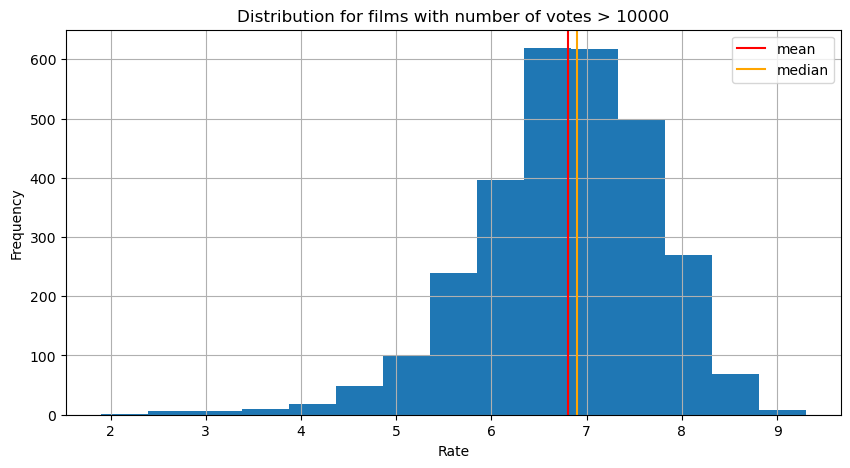

In [8]:
rate_counts_huge= films_huge_votes.Rate.astype(float)
plt.figure(figsize = (10,5))
rate_counts_huge.hist(bins=15)
plt.axvline(rate_counts_huge.mean(), color='red', label='mean')
plt.axvline(rate_counts_huge.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with number of votes > 10000')
plt.legend()
plt.show()

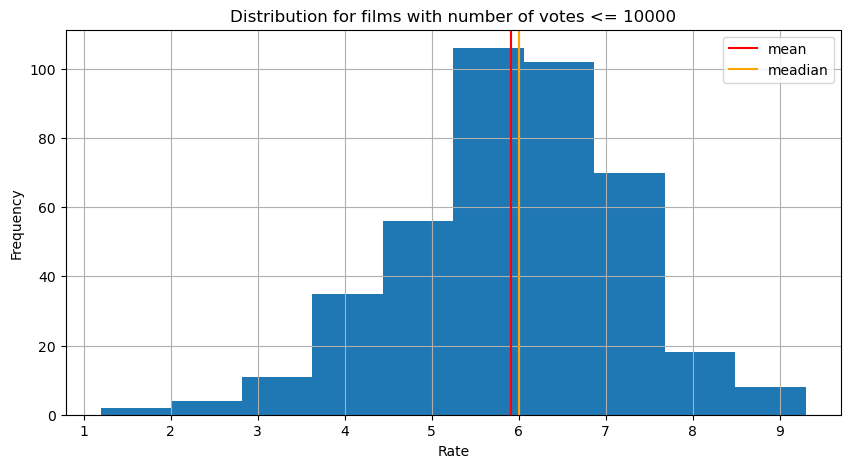

In [9]:
rate_counts_little = films_little_votes.Rate.astype(float)
plt.figure(figsize = (10,5))
rate_counts_little.hist(bins=10)
plt.axvline(rate_counts_little.mean(), color='red', label='mean')
plt.axvline(rate_counts_little.median(), color='orange', label='meadian')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with number of votes <= 10000')
plt.legend()
plt.show()

Распределения практически нормальные, выборки несвязные - используем двухвыборочный критерий Стьюдента!

Двувыборочный критерий Стьюдента (проверка гипотезы о равенстве средних двух выборок)
$$H_0: \mu_1 = \mu_2\\
H_1: \mu_1 \ne \mu_2$$
Распределение выборок должно не иметь выбросов, быть умеренно асимметричным (т.е. близким к нормальному).

In [10]:
from scipy import stats

stats.ttest_ind(rate_counts_huge, rate_counts_little)

TtestResult(statistic=17.02778167025298, pvalue=2.138480742511395e-62, df=3314.0)

Таким образом получили, что нулевая гипотеза $H_0$ не подтвердилась, то есть мы подтвердили справедливость $H_1$. Это значит, что средние рейтинги не совпали.

А в нашем случае вышло,  что чем больше отзывов у фильма, тем выше у него рейтинг!

# Проверка второй гипотезы

$H_0$: Средний рейтинг фильмов с возрастным ограничением "R" равне среднему рейтингу фильмов с возрастным ограничением "PG-13".

$H_1$: Средний рейтинг фильмов с возрастным ограничением "R" не равен среднему рейтингу фильмов с возрастным ограничением "PG-13".

In [11]:
films_r = Films[Films['Certificate']=='R']
films_pg = Films[Films['Certificate']=='PG-13']

rate_counts_r = films_r.Rate.astype(float)
rate_counts_pg = films_pg.Rate.astype(float)
rate_counts_r

1       6.3
2       6.4
20      7.7
29      6.1
31      6.3
       ... 
5013    6.3
5016    7.1
5020    6.3
5025    7.3
5027    6.3
Name: Rate, Length: 1473, dtype: float64

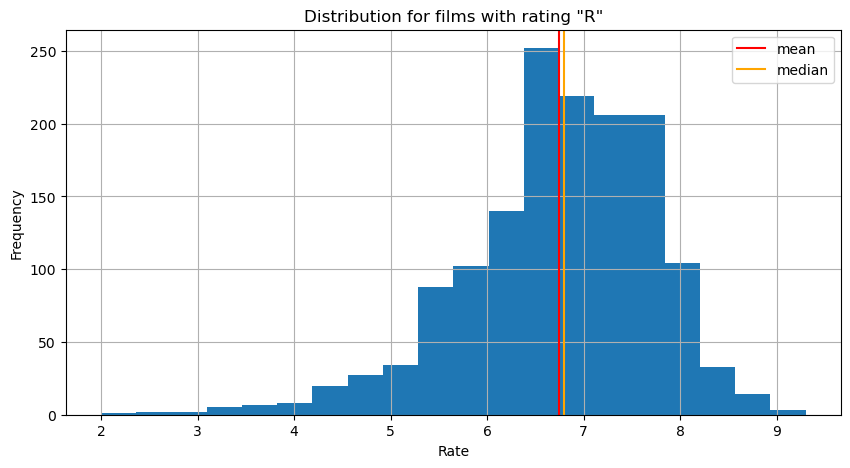

In [12]:
plt.figure(figsize = (10,5))
rate_counts_r.hist(bins=20)
plt.axvline(rate_counts_r.mean(), color='red', label='mean')
plt.axvline(rate_counts_r.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with rating "R"')
plt.legend()
plt.show()

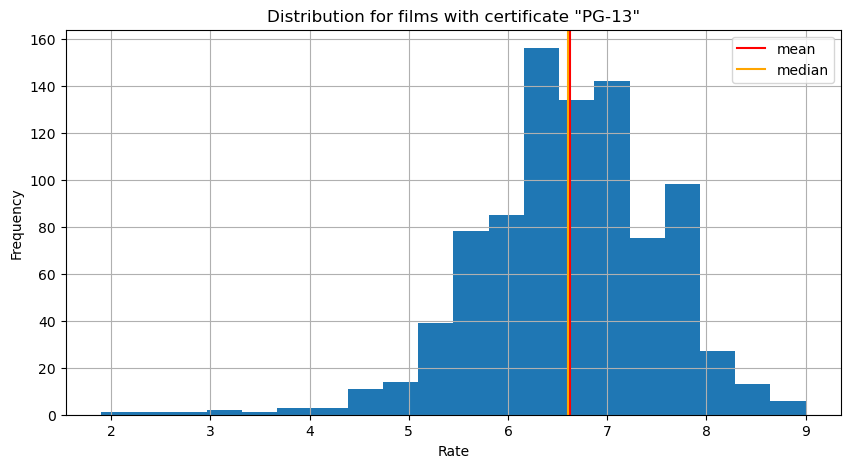

In [13]:
plt.figure(figsize = (10,5))
rate_counts_pg.hist(bins=20)
plt.axvline(rate_counts_pg.mean(), color='red', label='mean')
plt.axvline(rate_counts_pg.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with certificate "PG-13"')
plt.legend()
plt.show()

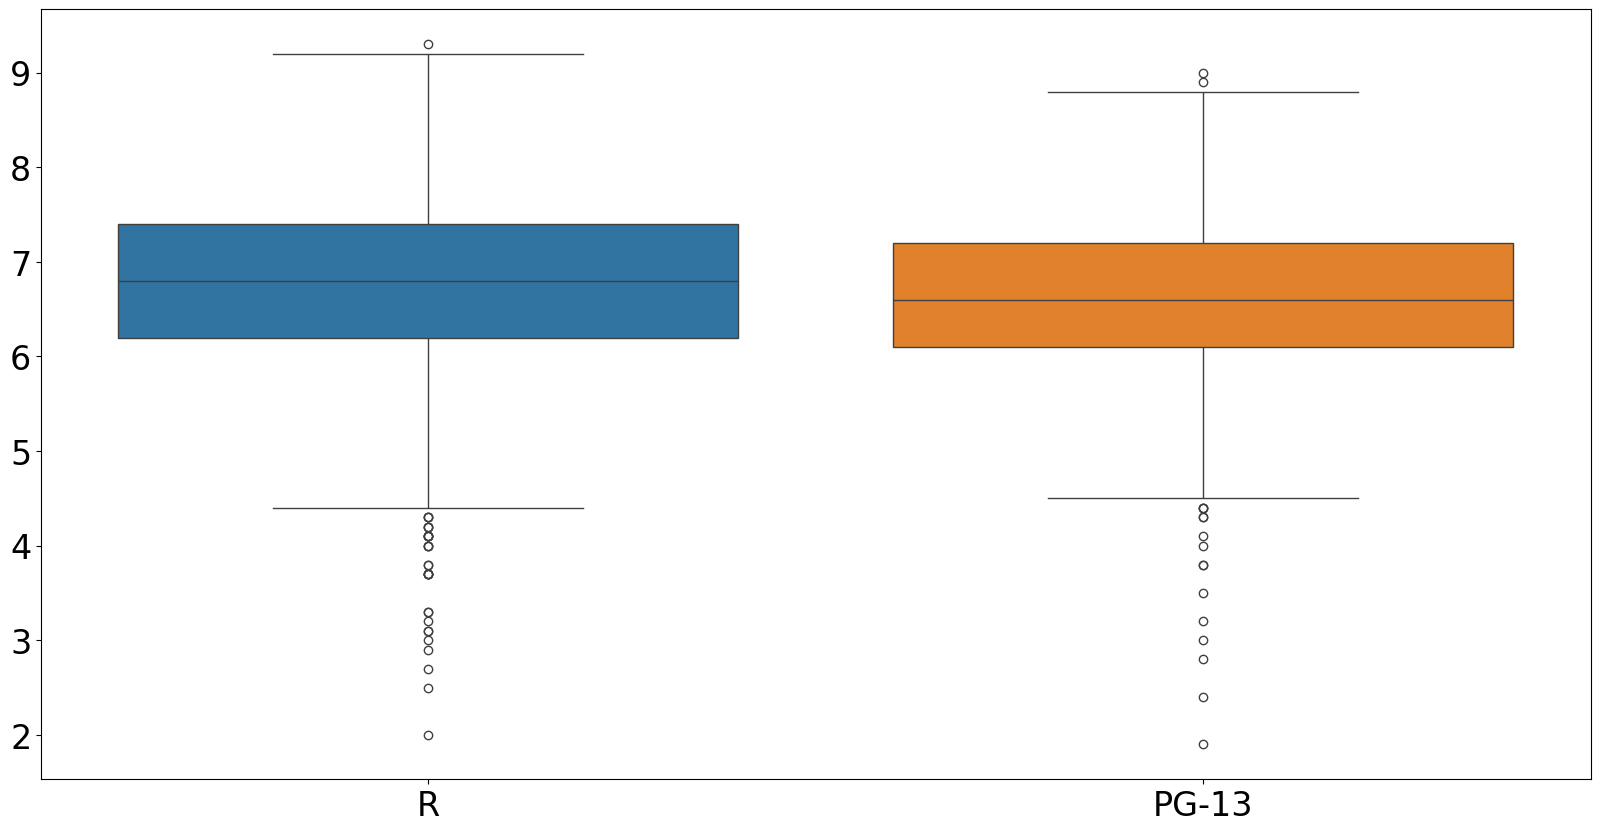

In [14]:
df = pd.DataFrame(
    {'R': rate_counts_r,
     'PG-13': rate_counts_pg
    }
)

plt.figure(figsize=(20,10))
plt.gca().tick_params(axis='both', which='major', labelsize=24)
sns.boxplot(data=df)
plt.xticks([0,1], ['R', 'PG-13'])
plt.show()

Чето много выбросов...

Проверим на тестах Шапиро о нормальности распредлений

In [15]:
stats.shapiro(rate_counts_r)

ShapiroResult(statistic=0.9671040456975281, pvalue=8.446728504859191e-18)

In [16]:
stats.shapiro(rate_counts_pg)

ShapiroResult(statistic=0.9758998727406755, pvalue=5.768768887236057e-11)

Таким образом распределение рейтингов для данных возрастных ограничений будем считать ненормальными. Как следствие используем тест Уилкосона-Манна-Уитни.

In [17]:
stats.mannwhitneyu(rate_counts_r, rate_counts_pg)

MannwhitneyuResult(statistic=719793.5, pvalue=6.228689480555366e-05)

А если бы считали нормально-распределенными наборами данных

In [18]:
stats.ttest_ind(rate_counts_r, rate_counts_pg)

TtestResult(statistic=2.943208481222916, pvalue=0.003279973495395114, df=2361.0)

Выводы пока непонятны...

# Модель линейной регрессии

Посмотрим на зависимость целевой переменной Rate от выбранных Votes, Duration, Date, Nudity, Violence, Alcohol. Для этого сначала подготовим датасет.

Берем только фильмы с большим числом отзывов!

In [104]:
Films_new = Films.dropna(subset=['Nudity', 'Violence', 'Alcohol'])
Films_new = Films_new[Films_new['Votes'] < 100000]

Теперь придется перекодировать Nudity, Violence, Alcohol в иные значения. Для начала посмотрим все уникальные для них.

In [105]:
Films_new['Nudity'].unique()

array(['Moderate', 'Severe', 'Mild', 'No Rate'], dtype=object)

In [106]:
Films_new['Violence'].unique()

array(['Severe', 'No Rate', 'Moderate', 'Mild'], dtype=object)

In [107]:
Films_new['Alcohol'].unique()

array(['Moderate', 'Mild', 'No Rate', 'Severe'], dtype=object)

Делаем замену у всех: 

No Rate -> 0, Severe -> 1, Moderate -> 2, Mild -> 3

In [108]:
score_change = {'No Rate': 0, 'Severe': 1, 'Moderate': 2, 'Mild': 3}

Films_new['Nudity'] = Films_new['Nudity'].map(score_change)
Films_new['Violence'] = Films_new['Violence'].map(score_change)
Films_new['Alcohol'] = Films_new['Alcohol'].map(score_change)
Films_new

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,2,1,Severe,2,Moderate
20,The Last Duel,2021,7.7,6498.0,"Action, Drama, History",152.0,Film,R,-,1,1,Moderate,3,Severe
30,There's Someone Inside Your House,2021,4.8,7724.0,"Horror, Mystery, Thriller",96.0,Film,TV-MA,-,3,1,Moderate,2,Moderate
32,Wolf,2021,4.1,229.0,"Drama, Mystery, Thriller",98.0,Film,NaN,-,0,0,No Rate,0,No Rate
35,The Night House,2020,6.5,14936.0,"Horror, Mystery, Thriller",107.0,Film,R,-,3,2,Moderate,2,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,Alvin and the Chipmunks: The Road Chip,2015,5.0,18357.0,"Animation, Adventure, Comedy",92.0,Film,PG,-,3,3,Mild,3,Mild
5019,The Red Sea Diving Resort,2019,6.6,26953.0,"Drama, History, Thriller",129.0,Film,TV-MA,-,3,2,Moderate,3,Severe
5020,How High,2001,6.3,56036.0,"Comedy, Fantasy",93.0,Film,R,-,2,3,Severe,1,NaN
5021,Chugyeokja,2008,7.8,62423.0,"Action, Crime, Thriller",125.0,Film,Not Rated,-,3,1,Moderate,3,Severe


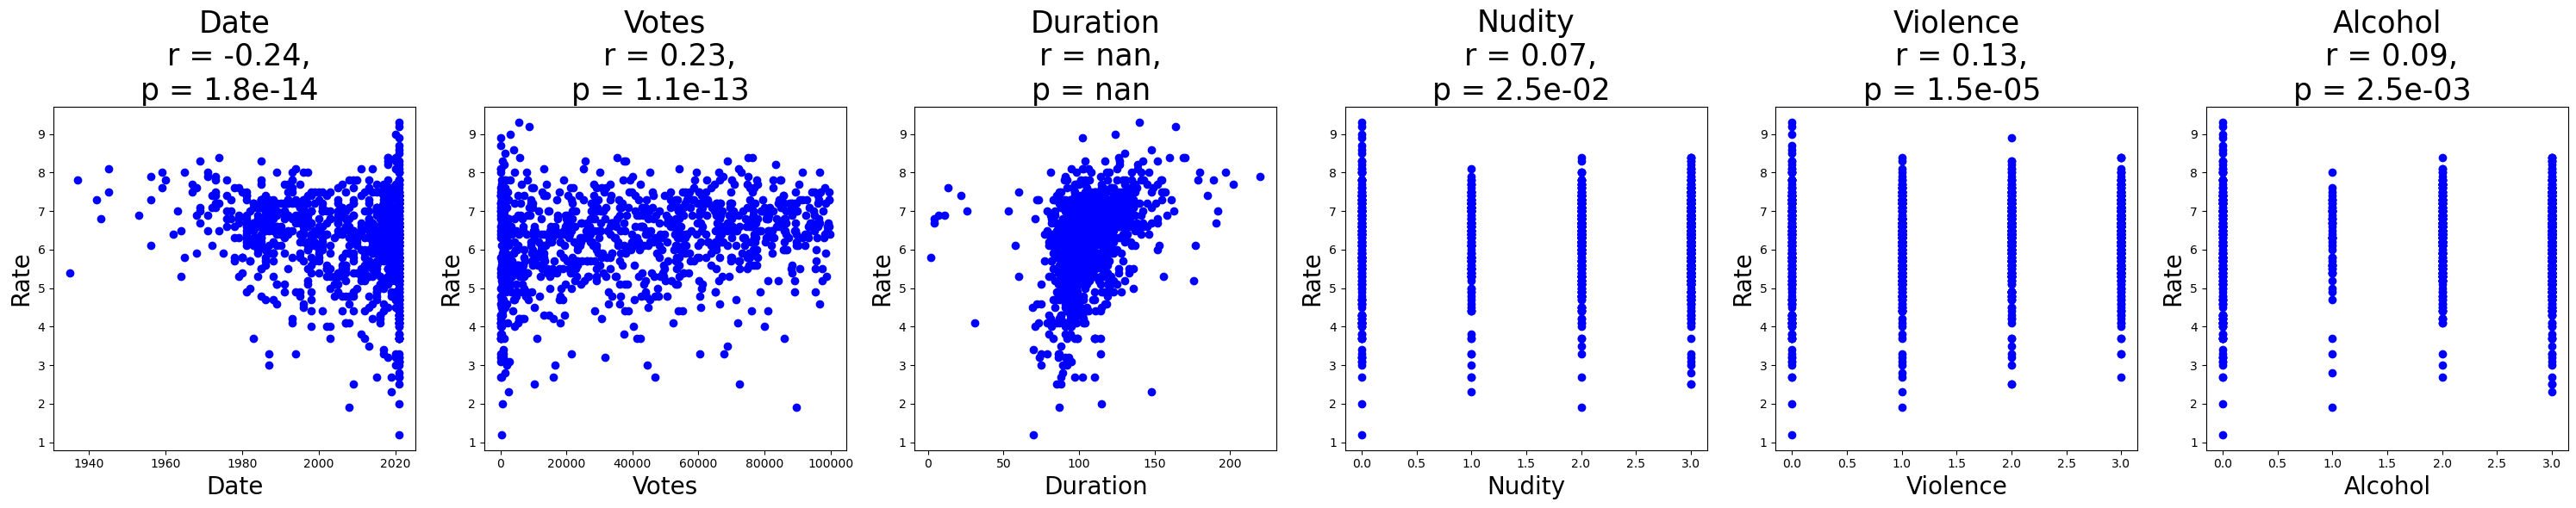

In [109]:
plt.figure(figsize=(30,6))
features=['Date', 'Votes', 'Duration', 'Nudity', 'Violence', 'Alcohol']
for i,feature in enumerate(features,start=1):
    plt.subplot(1,6,i)
    x = Films_new[feature]
    y = Films_new['Rate']
    regres = stats.linregress(x,y)
    plt.plot(x,y,'bo')
    plt.ylabel("Rate", fontsize=20)
    plt.xlabel(feature, fontsize=20)
    plt.title(f'{feature}\n r = {regres.rvalue:.2f},\np = {regres.pvalue:.1e} ', fontsize=25)
plt.tight_layout()

Выкинем Duration - у него получаются nan значения.

Text(0.5, 1.0, 'Корреляционная матрица между выбранными признаками')

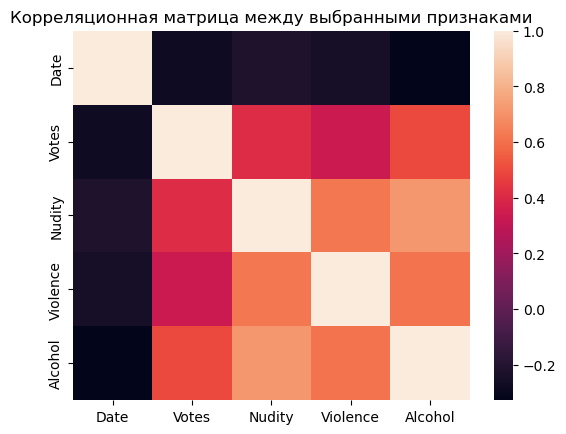

In [110]:
new_features = ['Date', 'Votes', 'Nudity', 'Violence', 'Alcohol']
X = Films_new[new_features]

sns.heatmap(X.corr())
plt.title('Корреляционная матрица между выбранными признаками')

In [111]:
first_results = sm.OLS(Films_new['Rate'], X).fit()

In [112]:
first_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rate   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              6547.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        21:33:00   Log-Likelihood:                         -1560.3
No. Observations:                1031   AIC:                                      3131.
Df Residuals:                    1026   BIC:                                      3155.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Date           0.0029   3.74e-05     77.864      0.000       0.003       0.003
Votes       8.906e-06   1.27e-06      7.025      0.000    6.42e-06    1.14e-05
Nudity        -0.0757      0.047     -1.624      0.105      -0.167       0.016
Violence       0.1427      0.043      3.334      0.001       0.059       0.227
Alcohol       -0.0384      0.046     -0.827      0.408      -0.129       0.053
==============================================================================
Omnibus:                       87.468   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.583
Skew:                          -0.631   Prob(JB):                     9.83e-30
Kurtosis:                       4.232   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Есть мультиколлинеарность в Violence, Nudity и Alcohol. Оставим только Nudity. Не спрашивайте почему)

Text(0.5, 1.0, 'Корреляционная матрица между выбранными признаками')

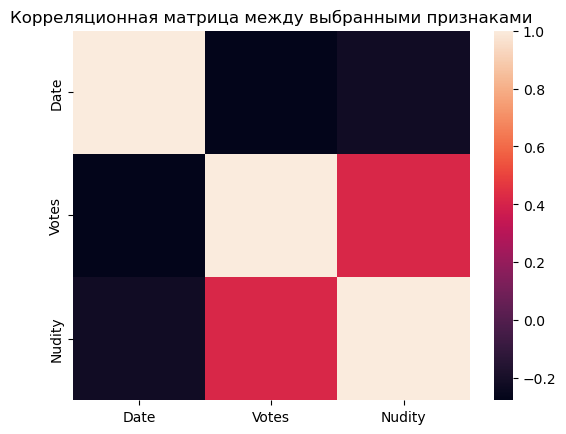

In [113]:
new_features = ['Date', 'Votes', 'Nudity']
X_new = Films_new[new_features]

sns.heatmap(X_new.corr())
plt.title('Корреляционная матрица между выбранными признаками')

In [114]:
def get_variance_inflation_factor(X,feature):
    """
    Calculate variance inflation factor 
    for the feature for given dataset X
    assume that const is included in X
    
    return VIF
    """
    _X = X[[col for col in X.columns if col != feature]]
    _y = X[feature]
    
    res = sm.OLS(_y, _X).fit()
    
    R_sq = res.rsquared
    
    return 1./(1 - R_sq) 

In [115]:
for feature in new_features:
    vif = get_variance_inflation_factor(X_new,feature)
    print(feature, f'{vif:.2f}')

Date 4.23
Votes 3.04
Nudity 4.71


In [116]:
results = sm.OLS(Films_new['Rate'], X_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rate   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                          1.081e+04
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        21:33:01   Log-Likelihood:                         -1565.8
No. Observations:                1031   AIC:                                      3138.
Df Residuals:                    1028   BIC:                                      3152.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Date           0.0029   3.53e-05     83.118      0.000       0.003       0.003
Votes        9.03e-06   1.21e-06      7.479      0.000    6.66e-06    1.14e-05
Nudity        -0.0209      0.033     -0.626      0.531      -0.087       0.045
==============================================================================
Omnibus:                       85.701   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.027
Skew:                          -0.632   Prob(JB):                     2.61e-28
Kurtosis:                       4.166   Cond. No.                     4.83e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals : $y - \\hat{y}/\\sigma$')

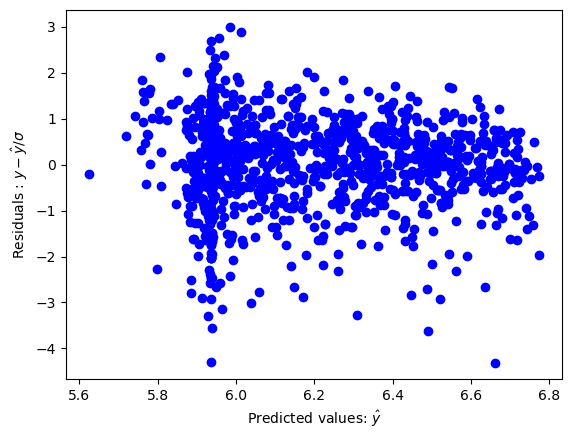

In [117]:
plt.plot(results.predict(X_new),
         results.resid/np.std(results.resid),'bo')
plt.xlabel(r"Predicted values: $\hat{y}$")
plt.ylabel(r"Residuals : $y - \hat{y}/\sigma$")

In [118]:
_X = X_new
_y = Films_new['Rate']

In [119]:
results = sm.OLS(np.log(_y),X_new).fit()

In [120]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Rate   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          2.562e+04
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                        0.00
Time:                        21:34:19   Log-Likelihood:                          151.97
No. Observations:                1031   AIC:                                     -297.9
Df Residuals:                    1028   BIC:                                     -283.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Date           0.0009   6.68e-06    129.473      0.000       0.001       0.001
Votes       1.654e-06   2.28e-07      7.251      0.000    1.21e-06     2.1e-06
Nudity         0.0033      0.006      0.525      0.600      -0.009       0.016
==============================================================================
Omnibus:                      404.095   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2268.362
Skew:                          -1.714   Prob(JB):                         0.00
Kurtosis:                       9.407   Cond. No.                     4.83e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

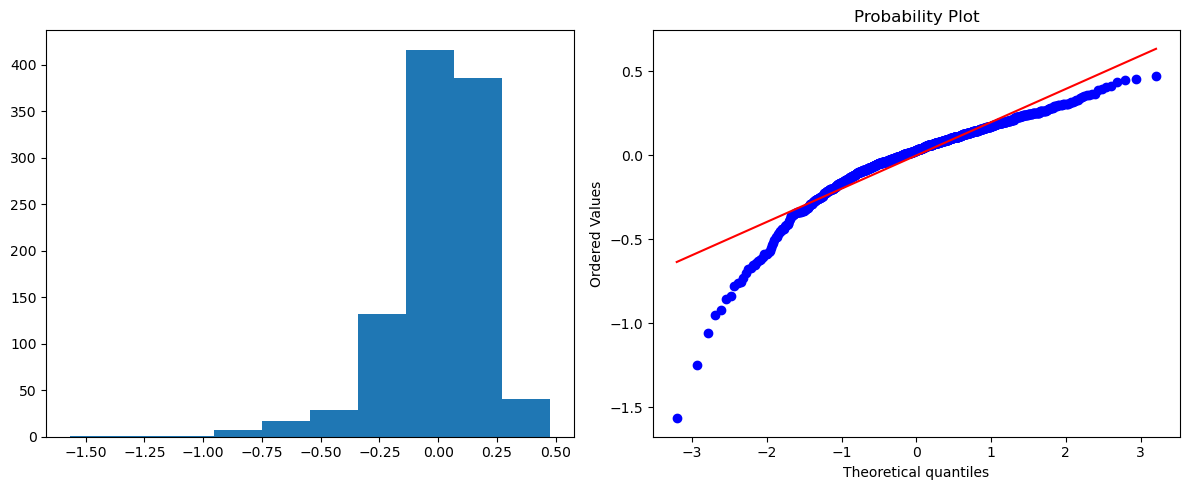

In [121]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(results.resid)

ax = plt.subplot(1,2,2)
stats.probplot(results.resid,plot=ax);
plt.tight_layout()